### Approach to the Project:
1. Defining the problem
2. Exloring the data
3. Data Preprocessing
4. Model Building
5. Fine-tune the models
6. Present Solution
7. Lauch the ML system

## Problem Statement:
The dataset "innercity" consists of housing prices in Seattle, Washington, USA with other features. Each column in the given data set is a particular building measurement/information w.r.t target variable price. The main objective here is to analyse the data with visualization and then predict house prices by building a generalized model.


### Data Information:
The data set in ‘innercity.csv’ is a single data source provided to us which consists of multiple variables where each column in the table represents particular building measurement information for that house property with the target variable as price.

In [ ]:
# Importing Necessary Libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from geopy.distance import great_circle

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the dataset:
url = "https://raw.githubusercontent.com/amit-maiti/Predicting-House-Prices-in-Seattle/master/innercity.csv"
df = pd.read_csv(url)

### Exploratory Data Analysis

In [ ]:
# Printing first fie rows of the dataframe:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [ ]:
# Information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [ ]:
# Shape of the data:
df.shape

(21613, 23)

In [ ]:
# Checking for missing values:
df.isnull().apply(pd.value_counts)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
False,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613


In [ ]:
## Checking for duplicate datapoints/rows:
df[df["cid"].duplicated() == True]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
1367,7657000540,20150304T000000,260000,4,1.00,1220,7980,1.5,0,0,3,6,1220,0,1944,0,98178,47.4924,-122.237,1210,7920,0,9200
1771,7977201065,20141104T000000,350000,3,1.75,1380,4590,1.0,0,0,2,7,930,450,1950,0,98115,47.6841,-122.293,1320,4692,0,5970
2764,5132000140,20150120T000000,415000,6,1.00,1370,5080,1.5,0,0,3,6,1120,250,1931,0,98106,47.5238,-122.350,1020,5080,0,6450
3266,2231500030,20141001T000000,315000,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,0,12934
3774,2767603612,20150113T000000,489000,2,2.25,1290,1334,3.0,0,0,3,8,1290,0,2007,0,98107,47.6719,-122.382,1350,1334,0,2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21354,1250201165,20141121T000000,441000,5,2.50,2000,3600,1.0,0,0,3,6,1150,850,1987,0,98144,47.5971,-122.295,1410,3600,0,5600
21364,2767602141,20141222T000000,650000,3,1.50,1380,4290,1.0,0,0,3,7,1080,300,1955,0,98107,47.6740,-122.379,1510,3900,0,5670
21429,4202400078,20150428T000000,335000,2,1.00,1410,7000,1.0,0,0,3,7,1410,0,1968,0,98055,47.4908,-122.223,1540,6000,0,8410
21553,2473380920,20140813T000000,206325,5,2.50,1720,10202,1.5,0,0,3,7,1720,0,1970,0,98058,47.4572,-122.167,1720,8478,0,11922


In [ ]:
# Checking the feature values:
df[df["cid"]==4202400078]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
13129,4202400078,20150128T000000,175000,2,1.0,1410,7000,1.0,0,0,3,7,1410,0,1968,0,98055,47.4908,-122.223,1540,6000,0,8410
21429,4202400078,20150428T000000,335000,2,1.0,1410,7000,1.0,0,0,3,7,1410,0,1968,0,98055,47.4908,-122.223,1540,6000,0,8410


Dataset info : The data set consists of 21613 records and 23 features. It contains three different data types which are int, float and object.

Missing Values : There's no missing or 'NaN' values present in the data set. 

Duplicate Records: There are 177 house properties for which duplicate records are present but for such duplicate records prices and ‘dayhours’ attribute values were found different while other feature values remain the same.This can be the cases where particular house property being sold more than one time with different prices. We'd like to use these datapoints becasue of price variance.

In [ ]:
# Five point Summary- Descriptive Statistics:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [ ]:
# Measure of skewness:
df.skew()

cid                  0.243329
price                4.021716
room_bed             1.974300
room_bath            0.511108
living_measure       1.471555
lot_measure         13.060019
ceil                 0.616177
coast               11.385108
sight                3.395750
condition            1.032805
quality              0.771103
ceil_measure         1.446664
basement             1.577965
yr_built            -0.469805
yr_renovated         4.549493
zipcode              0.405661
lat                 -0.485270
long                 0.885053
living_measure15     1.108181
lot_measure15        9.506743
furnished            1.526232
total_area          12.956067
dtype: float64

Features which are of continues like living_measure,lot_measure,basement,total_area have high standard deviation which indicates that these features have a wide range of spread.


By using skew function, we checked skewness of each feature and found the following: (living_measure,lot_measure,living measure15,lot_measure15,ceil_measure ,basement,total_area are heavily skewed) .This indicates population of data is not normalised.


### Univariate Analysis:

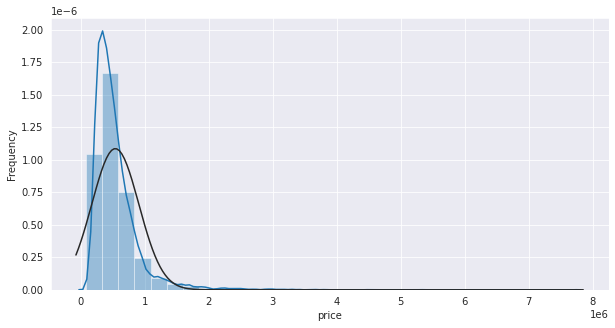

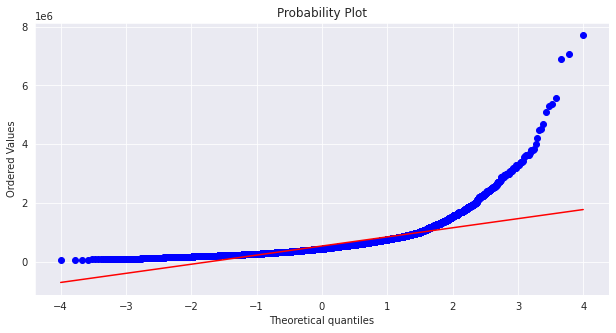

In [ ]:
# Target Variable: 'price'- Distribution
sns.set_style("darkgrid")
plt.subplots(figsize = (10,5))
plt.figure(1)
ax = sns.distplot(df["price"], bins= 30, fit = norm)
ax.set(xlabel= "price", ylabel = "Frequency")

plt.subplots(figsize = (10.3, 5))
plt.figure(2)
stats.probplot(df.price, plot = plt)
plt.show()

Target Variables Price of house property is rightly skewed which indicates that target variables contain outliers present mostly towards maximum value data points. 50% of the target variable data lies  between 321950 and 645000

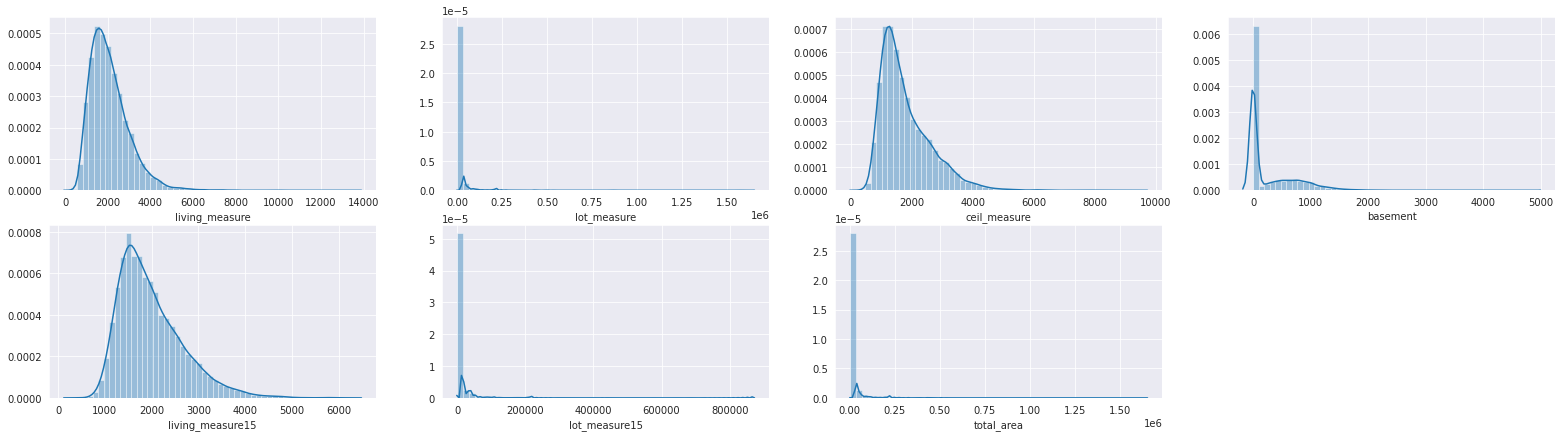

In [ ]:
## Continuous variable Distribution:
con = ["living_measure", "lot_measure", "ceil_measure", "basement", "living_measure15", "lot_measure15", "total_area"]
plt.figure(figsize = (27,7))
p = 1
for i in con:
  plt.subplot(2,4,p)
  sns.distplot(df[i])
  p+=1

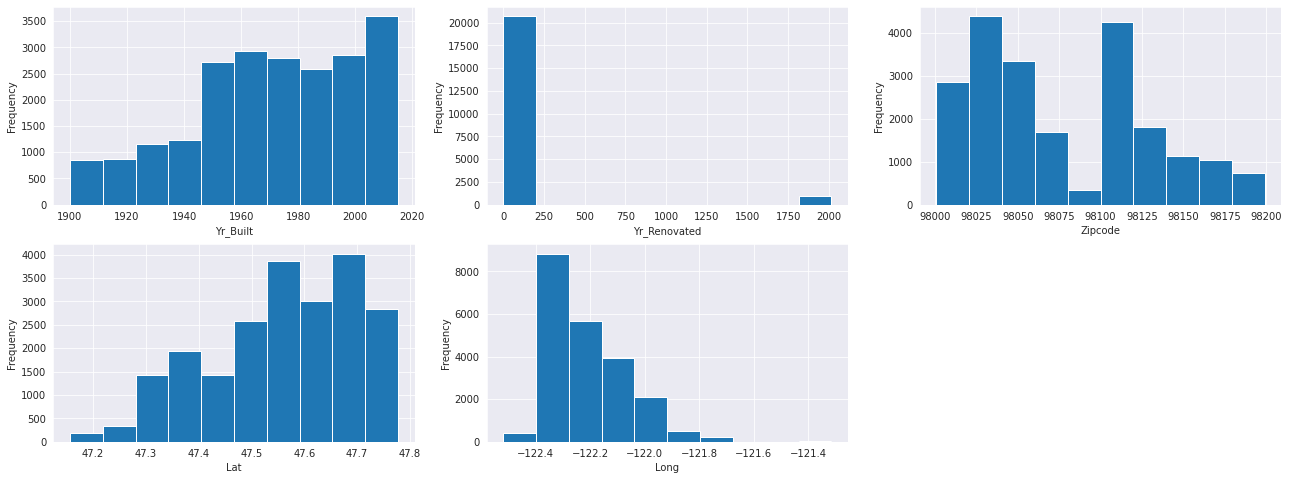

In [ ]:
## Histograms
var = "yr_built", "yr_renovated", "zipcode", "lat", "long"
plt.figure(figsize = (22,8))
p = 1
for i in var:
  plt.subplot(2,3,p)
  plt.hist(df[i])
  plt.xlabel(i.title()); plt.ylabel("Frequency")
  p+=1

- Overall 8 features have unimodal distribution and rest of the features are multimodal distribution (More than two peaks/distinct values).This means that for some features data is not normally distributed and having more than one peak.
- Range of year built of the house is between 1900 - 2015 which indicates that the given data set consists of houses which are more than 100 years old as well recently built houses.Approx 50% of houses were built before 1975.
- Apx. 95% data points have '0' values in yr_renovated that means those houses were not renovated. 


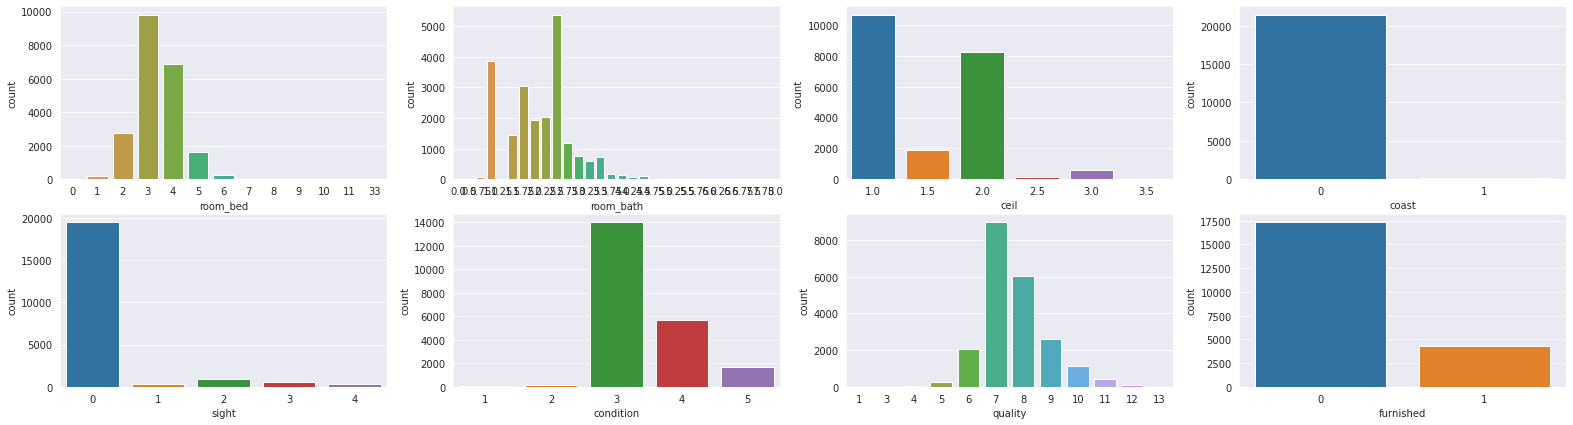

In [ ]:
# Categorical/Ordinal:
cat = ["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "furnished"]
plt.figure(figsize = (27,7))
p = 1
for i in cat:
  plt.subplot(2,4,p)
  sns.countplot(df[i])
  p+=1


- Approximately, 43% Houses have 3 bedrooms and 32% houses have 4 bedrooms. There is one house with 33 bedrooms- it might be an inn or resort. We'll keep it as there is only one such data point.
-  Apx. 46% houses are 1 story building wherein 34% houses are two story buildings.
-  Apx. 99% houses do not have coast/waterview.
-  90% houses are not being viewed.
- At Least 65% houses are rated as in good condition. 
- Only 20% houses are furnished


### Bi-Variate Analysis

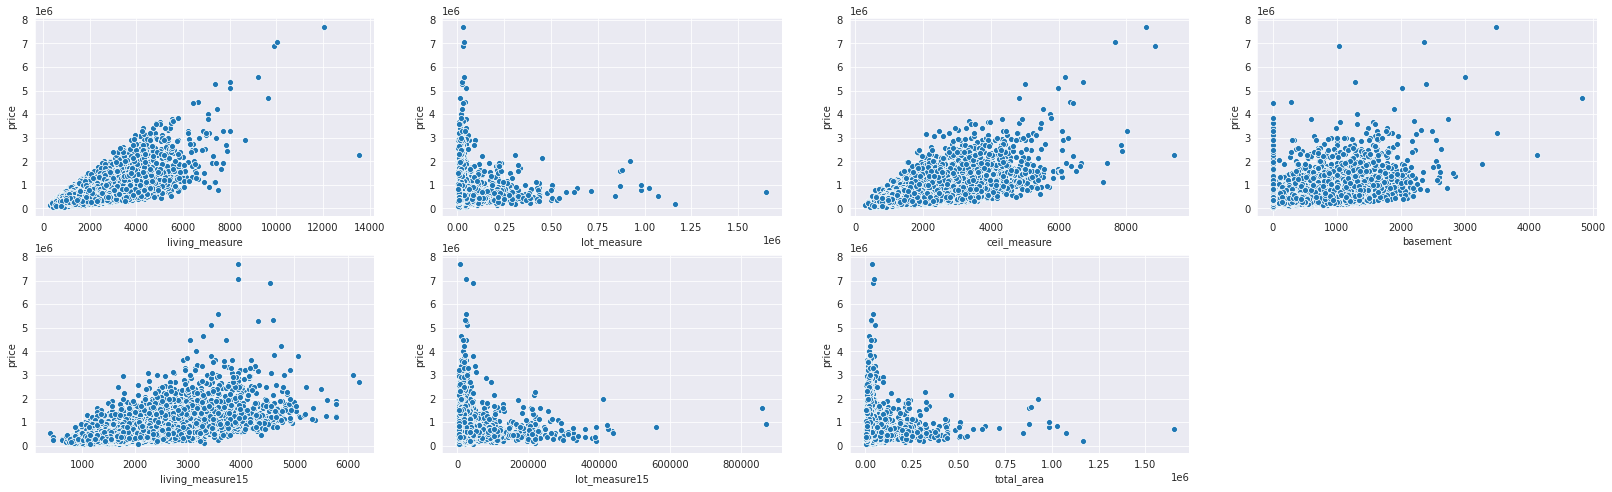

In [ ]:
## Relationship of continuous vaiables with target-'price'
con = ["living_measure", "lot_measure", "ceil_measure", "basement", "living_measure15", "lot_measure15", "total_area"]
plt.figure(figsize=(28,8))
p = 1
for i in con:
  plt.subplot(2,4,p)
  sns.scatterplot(df[i], df["price"])
  p+=1

- Living measure and ceiling measure have linear correlation with target respectively wherein total area is not linearly correlated with target. 

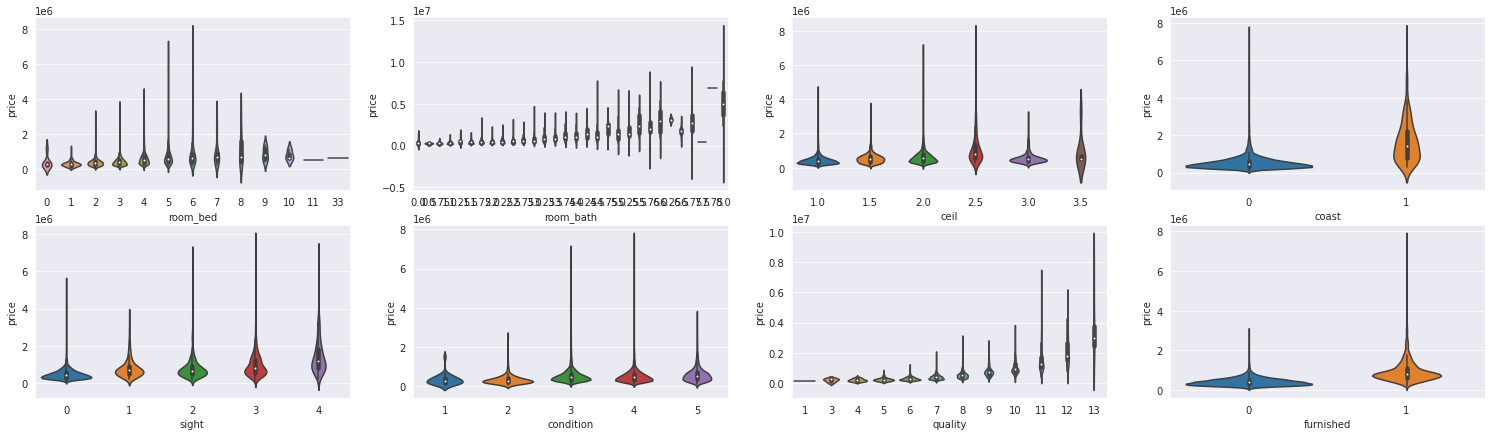

In [ ]:
## Relationship between categorical variable with Target:
cat = ["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "furnished"]
plt.figure(figsize=(26,7))
p = 1
for i in cat:
  plt.subplot(2,4,p)
  sns.violinplot(df[i], df["price"])
  p+=1

- Cost and furnished both the variables are linearly correlated with target. If the house has a coastal view, prices are high and same for furnished as well. 
- House price increases exponentially with quality.
-  House prices are very high for 5-7 bedrooms and 40% houses have 3 bedrooms.Prices increase for houses having bath rooms till 6, the slightly decreases and again very high for 8.
- House prices are stagnant till condition 2, but it increases at 2-4 linearly and very high for quality. 


In [ ]:
# Pair plot:
# sns.pairplot(df,diag_kind = 'kde')
# plt.show()

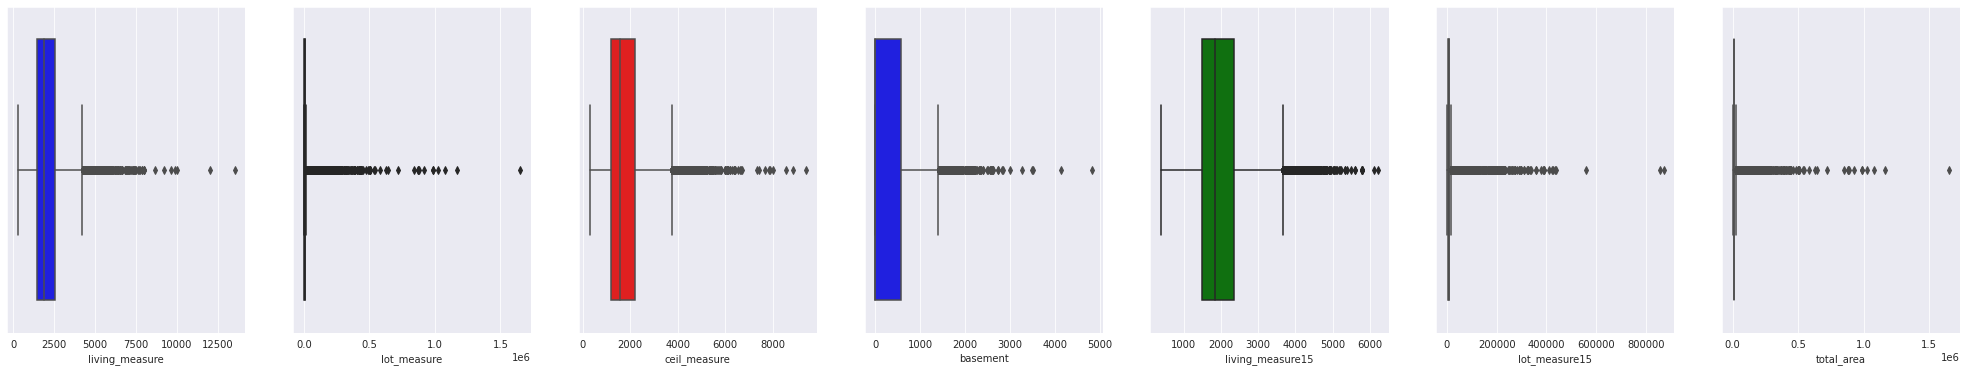

In [ ]:
# Box Plot - Checking the outliers:
f, axes = plt.subplots(1, 7, figsize = (35, 6))

sns.boxplot(df['living_measure'], color = 'blue', ax = axes[0])
sns.boxplot(df['lot_measure'], color = 'green', ax = axes[1])
sns.boxplot(df['ceil_measure'], color = 'red', ax = axes[2])
sns.boxplot(df['basement'], color = 'blue', ax = axes[3])
sns.boxplot(df['living_measure15'], color = 'green', ax = axes[4])
sns.boxplot(df['lot_measure15'], color = 'red', ax = axes[5])
sns.boxplot(df['total_area'], color = 'red', ax = axes[6])
plt.show()

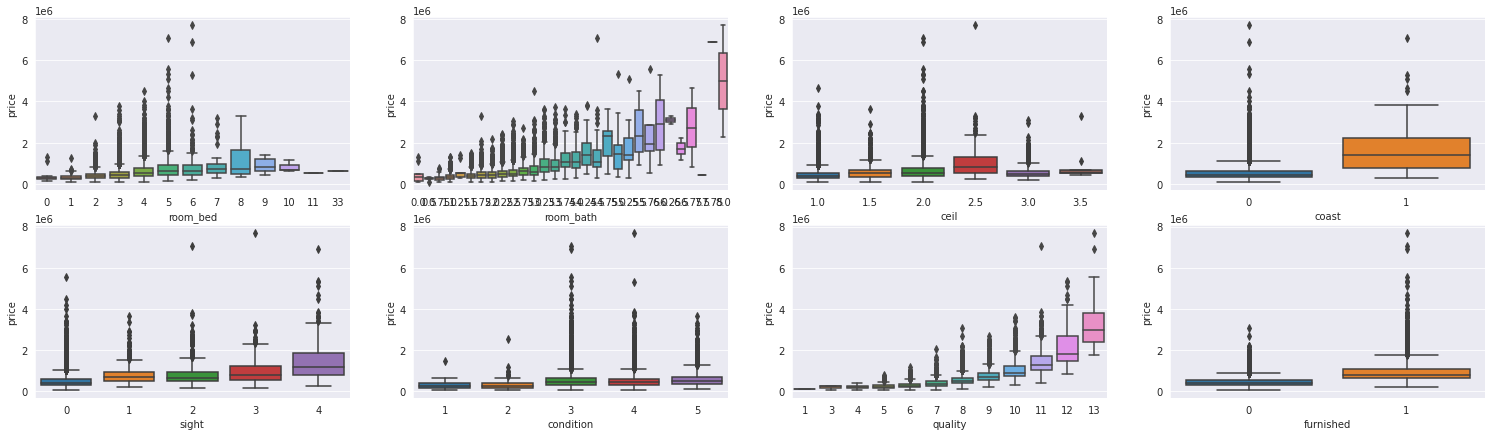

In [ ]:
## Relationship between categorical variable with Target in Boxplot:
cat = ["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "furnished"]
plt.figure(figsize=(26,7))
p = 1
for i in cat:
  plt.subplot(2,4,p)
  sns.boxplot(df[i], df["price"])
  p+=1
  # There are huge outliers for all these variables

- Through visualization as well as with the data distribution we can see there are outliers present for  every attribute including target variable price.
- If a house is visited or seen by a customer, the price variance is high for the maximum number of visits (sight values 3 and 4). 


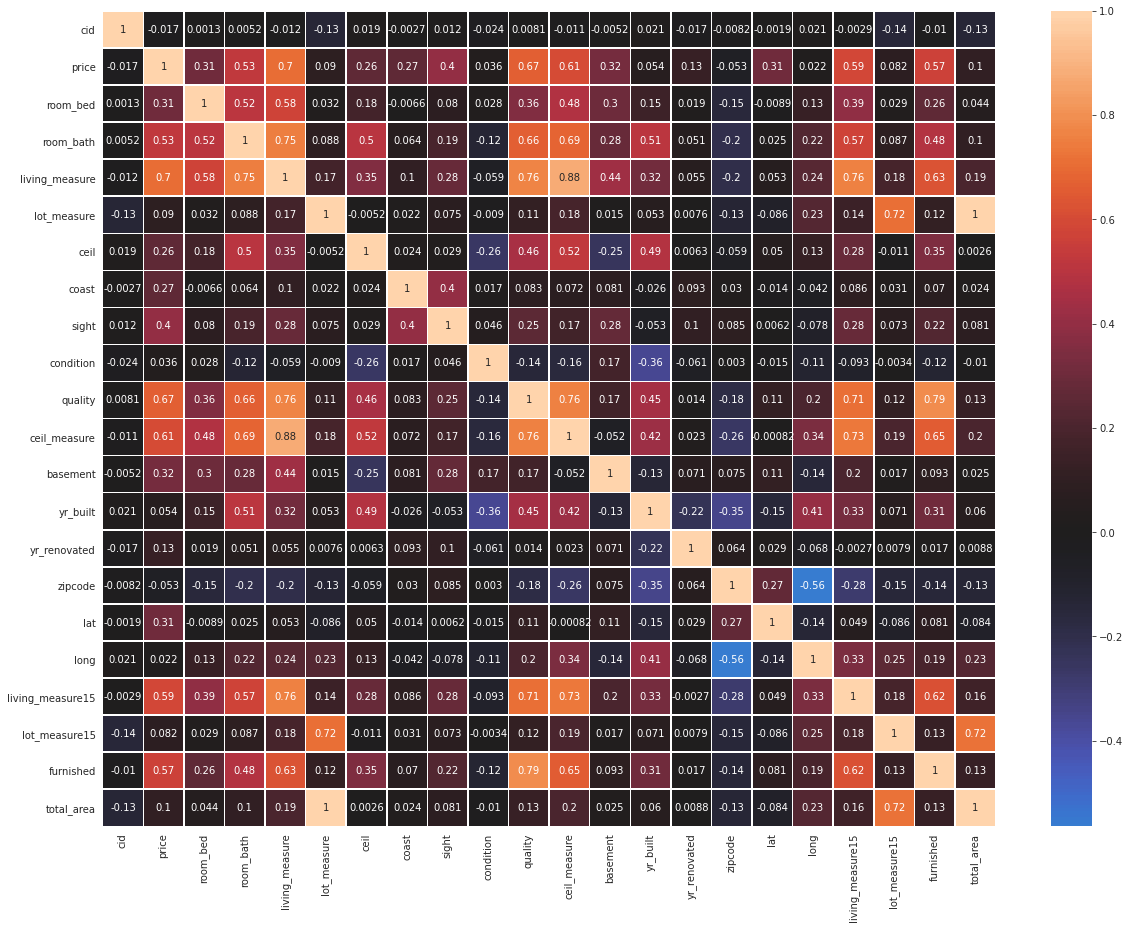

In [ ]:
# A HeatMap of Correlation Matrix

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=0.5,
            center=0)
plt.show()

-  Knowledge of correlation between independent variables is very important while training a regression model.
-  Variable ‘total area’ has a very high correlation with lot measure with correlation  value as 1.
- Living measure has a high correlation with bedroom, bathroom, ceiling, ceiling measure, quality and furnished. This means we may try to build our model after dropping some of these columns.
-  Quality of the house depends on bedroom, bathroom, furnished, living measures, ceiling, year built. Therefore, these variables are highly correlated with quality. This indicates that 


## Data Pre-processing

Feature Transformation

In [ ]:
# Coverting dayhours into yr_sold
df["yr_sold"] = df["dayhours"].apply(lambda x:x.split('T')[0][:4])
# Dropping notation of house and dayhours
df.drop(labels = ['dayhours'], axis =1, inplace = True)
df['yr_sold'] =  df['yr_sold'].astype(int)

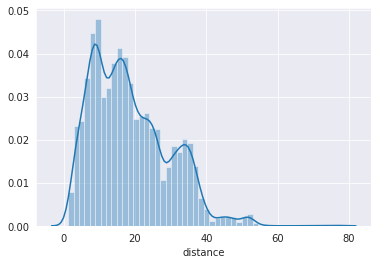

In [ ]:
# pip install geopy
# Working with latitide and longitude & measure distance from seattle central location
df1 = df.copy()
a = (47.608013, -122.335167) # Seattle central, standard latitude and longitude
dist_list = []
for i in range(len(df1["lat"])):
  b = (df1["lat"][i], df1["long"][i])
  dist = great_circle(a,b).km
  dist_list.append(dist)
se = pd.Series(dist_list)
df1["distance"] = se
# Dropping lattitude & longitude featres as we'll use distnace
df1 = df1.drop(["lat", "long"], axis = 1) 
# Transforming this latitude and lognitude value model accuracy increased by 1%
# It would be easy to use in km in production - for example- the hosue is 20 km away from the central city of Seattle

# Distribution of new feature- 'distance':
sns.distplot(df1.distance)
plt.show()

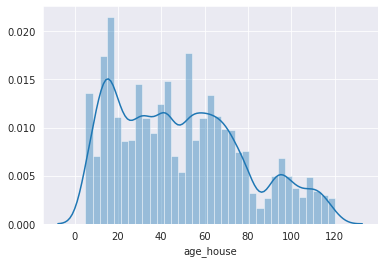

In [ ]:
# Let's convert yr_built to how old is the house:

df1["age_house"] = df1["yr_built"].apply(lambda x: 2020 -x)
df1 = df1.drop(["yr_built"], axis = 1)

# Distribution of new feature - age_house
sns.distplot(df1.age_house)
plt.show()

Data Split

In [ ]:
# Seperating independent :
X = df1.drop(['cid','price'], axis = 1)
y = df1.price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 11)
X_train.shape, X_test.shape

((17290, 20), (4323, 20))

## Model Building 

In [ ]:
# Defining a function to train and test models:
def model_building(model, X_train, X_test, y_train, y_test): 
  
  model.fit(X_train,y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_score = round(model.score(X_train, y_train), 2)
  test_score = round(model.score(X_test, y_test), 2)

  MSE_train = mean_squared_error(y_train, train_pred)
  MSE_test = mean_squared_error(y_test, test_pred)

  return train_score, test_score, MSE_train, MSE_test 

Iteration-1
- data- withoutlier, without scaling, feature transaformation- distance, age_house

In [ ]:
# # Model training: Without Feature Engineering
# Linear Regression:
lr = LinearRegression()
lr_train_score, lr_test_score, MSE_train_lr, MSE_test_lr = model_building(lr, X_train, X_test, y_train, y_test)
lr_train_score, lr_test_score, MSE_train_lr, MSE_test_lr 
# The model is performing very badly as mean square error is very high

(0.73, 0.71, 36500222912.988945, 40369805109.57643)

Iteration-2
- Iteration 1 & label encoding

Label Encoding

In [ ]:
# # Features for label encoding: yr_renovated, zipcode
X_train1 = X_train.copy()
X_test1 = X_test.copy()
label_encoder = LabelEncoder()
cat_vars = ["zipcode", "yr_renovated", "yr_sold"]

def encode(data):
  nonnull = np.array(data.dropna())
  impute_reshape = nonnull.reshape(-1,1) # Reshaping the data
  impute_label = label_encoder.fit_transform(impute_reshape)
  data.loc[data.notnull()] = np.squeeze(impute_label)
  return data
for col in cat_vars:
  encode(X_train1[col])
  encode(X_test1[col])

One- Hot Encoding:


In [ ]:
## One hot encoding- ceil and sight 
X_train1 = pd.get_dummies(X_train1, columns = ["ceil", "sight", "condition"])
X_test1 = pd.get_dummies(X_test1, columns = ["ceil", "sight", "condition"])

In [ ]:
# Linear regression
lr_train_score1, lr_test_score1, MSE_train_lr1, MSE_test_lr1 = model_building(lr, X_train1, X_test1, y_train, y_test)
lr_train_score1, lr_test_score1, MSE_train_lr1, MSE_test_lr1

(0.73, 0.71, 35923384817.49707, 39613513102.15377)

In [ ]:
((MSE_test_lr - MSE_test_lr1)/MSE_test_lr)*100

1.8734101028475239

Note on encoding:
- After using label encoding "zipcode", "yr_renovated", "yr_sold" and one-hot ending on "ceil", "sight",  model performance improved by 1.87% based on MSE score. One-hot encoding on coast, furnished, condition, yr_sold does not improve model performace.

Iteration-3
- Linear Regression - Multivariate normality check

In [ ]:
X_train1.skew()

room_bed             2.328575
room_bath            0.525836
living_measure       1.510800
lot_measure         13.542147
coast               11.634035
quality              0.760948
ceil_measure         1.450328
basement             1.605387
yr_renovated         5.095952
zipcode             -0.057678
living_measure15     1.104660
lot_measure15       10.039854
furnished            1.523830
total_area          13.438980
yr_sold              0.758974
distance             0.763584
age_house            0.468664
ceil_1.0             0.024990
ceil_1.5             2.907001
ceil_2.0             0.486463
ceil_2.5            11.493846
ceil_3.0             5.666208
ceil_3.5            49.673217
sight_0             -2.691755
sight_1              7.860214
sight_2              4.380516
sight_3              6.319337
sight_4              8.051717
condition_1         25.248417
condition_2         10.938606
condition_3         -0.622770
condition_4          1.077154
condition_5          3.129063
dtype: flo

In [ ]:
# Following variables are heavely skewed- try Log transformation which helps in data distribution colose to gaussian
# lot_measure, lot_measure15, total area
X_train2 = X_train1.copy()
X_test2 = X_test1.copy()
var_log = ["room_bed", "room_bath", "lot_measure", "basement", "lot_measure15", "total_area"]
X_train2[var_log] = X_train2[var_log].applymap(lambda x: np.log(x+1))
X_test2[var_log] = X_test2[var_log].applymap(lambda x: np.log(x+1))

In [ ]:
# Linear regression
lr_train_score2, lr_test_score2, MSE_train_lr2, MSE_test_lr2 = model_building(lr, X_train2, X_test2, y_train, y_test)
lr_train_score2, lr_test_score2, MSE_train_lr2, MSE_test_lr2
# There was no imprevement even after using log transformation for selective skewed variables

(0.73, 0.71, 36077169998.763626, 39895512254.18402)

Iteration-4
- Assumtiption- dealing with multicolinearity 

In [ ]:
## Multi- colinearity detection using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(V):
  vif = pd.DataFrame()
  vif["variables"] = V.columns
  vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]
  return vif
## Calculating VIF
cal_vif(X_train1)

,variables,VIF
0,room_bed,1.672776
1,room_bath,3.428930
2,living_measure,inf
3,lot_measure,inf
4,coast,1.524604
5,quality,4.890605
6,ceil_measure,inf
7,basement,inf
8,yr_renovated,1.156807
9,zipcode,1.543221


In [ ]:
# Dropping selctive variable whos VIF is very high. 
# living measure & lot measure both have identical variables measured in 2015 respectivelly- using the latesed value.
# Total area is highly correlated with living measure
XX = X_train1.copy()
X_train3 = XX.drop(["living_measure15", "lot_measure15", "ceil_measure", "ceil_1.5", "ceil_2.5", "ceil_3.5", "sight_0", "condition_3"], axis = 1)
cal_vif(X_train3)

,variables,VIF
0,room_bed,22.116835
1,room_bath,28.811085
2,living_measure,inf
3,lot_measure,inf
4,coast,1.533886
5,quality,66.332583
6,basement,2.987435
7,yr_renovated,1.183481
8,zipcode,6.018175
9,furnished,2.723490


In [ ]:
XT = X_test1.copy()
X_test3 = XT.drop(["living_measure15", "lot_measure15", "ceil_measure", "ceil_1.5", "ceil_2.5", "ceil_3.5", "sight_0", "condition_3"], axis = 1)

In [ ]:
# Linear regression -4
lr_train_score3, lr_test_score3, MSE_train_lr3, MSE_test_lr3 = model_building(lr, X_train3, X_test3, y_train, y_test)
lr_train_score3, lr_test_score3, MSE_train_lr3, MSE_test_lr3

(0.73, 0.71, 36155533877.90804, 39685772513.29208)

Note on Multicolinearity:
- If the VIF value is above 5, that variable is highly correlated with other features. 
- After dropping four features, having very high VIF values, model performance drops. living measure and lot measure both have indentical features i.e. living measure15 and lot measure15. They must be droped, using only the latest measurement in 2015. Quality is highky corelated with furnished, condition, room bed, room bath etc. Therfore, dropping quality. In production, even its difficult to use as it is a kind of rank. Ceiling measure is related with living measure as well. 
- After trying various linear assumption, we find that linear model might not be right fit to the data

Iteration-5
- Outlier treatment

In [ ]:
# Outlier treatment by caping extrem lowest and highet values by 5% & 95% pecentile values respectivelly 
# Features for outlier treatment- slective wherein outlier counts are much more higher thank other features. Focused on continuous variables
X_train4 = X_train3.copy()
X_test4 = X_test3.copy()
cols = ["basement", "living_measure", "lot_measure", "total_area"]
for i in cols:
  upper_limit = X_train4[i].quantile(0.95)
  lower_limit = X_test4[i].quantile(0.05)

  X_train4.loc[(X_train4[i] > upper_limit), i] = upper_limit
  X_test4.loc[(X_test4[i] < lower_limit), i] = lower_limit
  

In [ ]:
# Linear regression -5
lr_train_score4, lr_test_score4, MSE_train_lr4, MSE_test_lr4 = model_building(lr, X_train4, X_test4, y_train, y_test)
lr_train_score4, lr_test_score4, MSE_train_lr4, MSE_test_lr4
# There is no improvement but model performance dropped after outlier treatment

(0.68, 0.61, 42228777854.11562, 54107873494.766014)

Iteration-6
- Scaling the features on dataset withoutliers

In [ ]:
# Sacling for selective features
# Ommiting the features whos value already is only 1 or 0: coast, furnished, yr_sold
XS = X_train3.copy()
XSS = XS.drop(["coast", "furnished", "yr_sold", "ceil_1.0", "ceil_2.0","ceil_3.0", "sight_1", "sight_2", "sight_3", "sight_4", "condition_1", "condition_2", "condition_4", "condition_5" ], axis = 1)
XSO = XS[["coast", "furnished", "yr_sold", "ceil_1.0", "ceil_2.0","ceil_3.0", "sight_1", "sight_2", "sight_3", "sight_4", "condition_1", "condition_2", "condition_4", "condition_5"]]

XS_test = X_test3.copy()
XSS_test = XS_test.drop(["coast", "furnished", "yr_sold", "ceil_1.0", "ceil_2.0","ceil_3.0", "sight_1", "sight_2", "sight_3", "sight_4", "condition_1", "condition_2", "condition_4", "condition_5"], axis = 1)
XSO_test = XS_test[["coast", "furnished", "yr_sold", "ceil_1.0", "ceil_2.0","ceil_3.0", "sight_1", "sight_2", "sight_3", "sight_4", "condition_1", "condition_2", "condition_4", "condition_5"]]

# Standard scaler
sc = StandardScaler()

XSS_scale = sc.fit_transform(XSS) # train - selective features
XSS_test_scale = sc.fit_transform(XSS_test) # test - selective features

# Lets's join sacaled and unscaled dataframs:
# result = pd.concat([df1, df4], axis=1, sort=False)
X_train5 = np.hstack((XSS_scale, XSO))
X_test5 = np.hstack((XSS_test_scale,XSO_test))

In [ ]:
# Linear regression -6
lr_train_score5, lr_test_score5, MSE_train_lr5, MSE_test_lr5 = model_building(lr, X_train5, X_test5, y_train, y_test)
lr_train_score5, lr_test_score5, MSE_train_lr5, MSE_test_lr5
# Performance of the model dropped after scaling the features:

(0.69, 0.68, 41535406418.083466, 44959101166.340065)

### Notes on Linear regression Model:
- After iterating 6 different linear regression model- using various data preparation techniques i.e. outlier treatment, scaling, encoding, log transformation, dropping of redundant/highly corrrelated features and considering various modeln assumption i.e. multicolienarity, feature relationship with response, multivariate normality etc. Linear regression model does not perform well. It could be possible that linear regression model does not fit well to the data. 

Iteration- 7
- Try polynomial regression

In [ ]:
## Model 7 - Regression with Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_pipe = make_pipeline(PolynomialFeatures(interaction_only = True), LinearRegression())
poly_pipe.fit(X_train3, y_train)
ytrain_pred_poly = poly_pipe.predict(X_train3)
ytest_pred_poly = poly_pipe.predict(X_test3)

MSE_train_poly = mean_squared_error(y_train, ytrain_pred_poly)
MSE_test_poly = mean_squared_error(y_test, ytest_pred_poly)
poly_train_score = poly_pipe.score(X_train3, y_train)
poly_test_score = poly_pipe.score(X_test3, y_test) 

poly_train_score, poly_test_score, MSE_train_poly, MSE_test_poly

(0.8204978082110821,
 0.7740247290249249,
 24059635974.454475,
 31320595555.088284)

In [ ]:
((MSE_test_lr3 - MSE_test_poly)/MSE_test_lr3)*100

30.231401252459328

Note on Polynomial regression:
- After trying Polynomial regression, model performance increased by 30% based on MSE on test data.

Regression Model Summary:

In [ ]:
reg_model = pd.DataFrame({"Model": ["LR Baseline", "LR One-Hot Encoding", "LR-Log Transform", "LR-Correlation Cosidered", "LR-Treat Outlier", "LR-Scaling", "Poly Reg-Interaction"], 
                               "Train Score": [lr_train_score, lr_train_score1,lr_train_score2, lr_train_score3, lr_train_score4, lr_train_score5, poly_train_score], 
                               "Test Score": [lr_test_score, lr_test_score1, lr_test_score2, lr_test_score3, lr_test_score4, lr_test_score5, poly_test_score], 
                               "MSE Train": [MSE_train_lr, MSE_train_lr1, MSE_train_lr2, MSE_train_lr3, MSE_train_lr4, MSE_train_lr5, MSE_train_poly], 
                               "MSE Test": [MSE_test_lr, MSE_test_lr1, MSE_test_lr2, MSE_test_lr3, MSE_test_lr4, MSE_test_lr5, MSE_test_poly]})
reg_model

,Model,Train Score,Test Score,MSE Train,MSE Test
0,LR Baseline,0.730000,0.710000,3.650022e+10,4.036981e+10
1,LR One-Hot Encoding,0.730000,0.710000,3.592338e+10,3.961351e+10
2,LR-Log Transform,0.730000,0.710000,3.607717e+10,3.989551e+10
3,LR-Correlation Cosidered,0.690000,0.680000,4.153541e+10,4.489211e+10
4,LR-Treat Outlier,0.680000,0.610000,4.222878e+10,5.410787e+10
5,LR-Scaling,0.690000,0.680000,4.153541e+10,4.495910e+10
6,Poly Reg-Interaction,0.820498,0.774025,2.405964e+10,3.132060e+10


### Regularization
- In the above 7 iteration, we observe models are slightly overfitting. Let's regularization

Iteration-8

In [ ]:
# Ridge Regression:
ridge = Ridge(alpha = 1.0)
ridge_train_score, ridge_test_score, MSE_train_ridge, MSE_test_ridge = model_building(ridge, X_train3, X_test3, y_train, y_test)

# Lasso Regression:
lasso = Lasso()
lasso_train_score, lasso_test_score, MSE_train_lasso, MSE_test_lasso = model_building(lasso, X_train3, X_test3, y_train, y_test)


In [ ]:
# Eavaluate Regularization Models:
regularization = pd.DataFrame({"Model": ["Ridge Regression", "Lasso Regression"], 
                               "Train Score": [ridge_train_score, lasso_train_score], 
                               "Test Score": [ridge_test_score, lasso_test_score], 
                               "MSE Train": [MSE_train_ridge, MSE_train_lasso], 
                               "MSE Test": [MSE_test_ridge, MSE_test_lasso]})
regularization

,Model,Train Score,Test Score,MSE Train,MSE Test
0,Ridge Regression,0.69,0.68,4.153563e+10,4.485870e+10
1,Lasso Regression,0.69,0.68,4.153541e+10,4.489118e+10


- Regalarization Model does not perform well as MSE value is very high comapred to Linear regression model on test data

### Ensemble Models
- We've already prepared data, let try various ensemble techniques
- We'll be using X_train3 and X_test3 data to train and test models
- In this dataset label encoding, one hot encoding are applied
- Highly correlated and redundant features are dropped
- age_house and distance are transformed features

Iteration- 9

In [ ]:
# Ensemble Models:
# Random Forest
rf = RandomForestRegressor()
rf_train_score, rf_test_score, rf_MSE_train, rf_MSE_test = model_building(rf, X_train3, X_test3, y_train, y_test)

# Ada Boosting Regressor:
abr = AdaBoostRegressor()
abr_train_score, abr_test_score, abr_MSE_train, abr_MSE_test = model_building(abr, X_train3, X_test3, y_train, y_test)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr_train_score, gbr_test_score, gbr_MSE_train, gbr_MSE_test = model_building(gbr, X_train3, X_test3, y_train, y_test)

# XG Boost Regressor:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr_train_score, xgbr_test_score, xgbr_MSE_train, xgbr_MSE_test = model_building(xgbr, X_train3, X_test3, y_train, y_test)

In [ ]:
# Evaluation:
evaluation = pd.DataFrame({"Model": ["Random Forest Regressor", "Ada Boost Regressor", "Gradient Boosting Regressor", "XGBoost regressor"],
                           "Train Score": [rf_train_score, abr_train_score,gbr_train_score, xgbr_train_score], 
                           "Test Score": [rf_test_score, abr_test_score,gbr_test_score, xgbr_test_score], 
                           "MSE Train": [rf_MSE_train, abr_MSE_train, gbr_MSE_train, xgbr_MSE_train], 
                           "MSE Test": [rf_MSE_test, abr_MSE_test, gbr_MSE_test, xgbr_MSE_test]})
evaluation

,Model,Train Score,Test Score,MSE Train,MSE Test
0,Random Forest Regressor,0.98,0.85,2.898141e+09,2.051025e+10
1,Ada Boost Regressor,0.21,0.20,1.060228e+11,1.110712e+11
2,Gradient Boosting Regressor,0.87,0.83,1.682503e+10,2.309421e+10
3,XGBoost regressor,0.87,0.84,1.714882e+10,2.252999e+10


### Feature Selection:

In [ ]:
# Best Feature Selection:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Apply SelectKBest 
best_features = SelectKBest(score_func=f_regression, k="all")
fit = best_features.fit(X_train3,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train3.columns)
#concat two dataframes for better visualization 
feature_Scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_Scores.columns = ['Specs','Score']  
print(feature_Scores.nlargest(25,'Score'))  

               Specs         Score
3            quality  13646.133472
7   living_measure15   8808.241413
9          furnished   8069.832905
1          room_bath   6599.782388
4           basement   2134.339197
0           room_bed   1850.056973
20           sight_4   1777.866811
12          distance   1543.951956
2              coast   1536.984831
14          ceil_1.0   1280.221607
15          ceil_2.0    974.589770
19           sight_3    603.940089
18           sight_2    390.159073
5       yr_renovated    354.744061
10        total_area    188.382032
17           sight_1    158.495849
8      lot_measure15    119.240067
24       condition_5     52.134446
22       condition_2     43.613484
13         age_house     40.495197
6            zipcode     39.926568
23       condition_4     12.800524
21       condition_1      7.784760
16          ceil_3.0      5.327482
11           yr_sold      0.145611


Iteration-10

In [ ]:
# Dropping features that are not contributing to model performance:
X_10 = X_train3.copy()
X_train10 = X_10.drop([ "yr_sold", "yr_renovated", "ceil_2.0", "ceil_3.0", "sight_1", "sight_2","sight_3" , "condition_1","condition_2",  "condition_4"], axis = 1)

X_10_test = X_test3.copy()
X_test10 = X_10_test.drop(["yr_sold", "yr_renovated", "ceil_2.0", "ceil_3.0", "sight_1", "sight_2","sight_3" ,"condition_1","condition_2",  "condition_4"], axis = 1)

In [ ]:
# Ensemble Models:
# Random Forest
rf = RandomForestRegressor()
rf_train_score10, rf_test_score10, rf_MSE_train10, rf_MSE_test10 = model_building(rf, X_train10, X_test10, y_train, y_test)

# Ada Boosting Regressor:
abr = AdaBoostRegressor()
abr_train_score10, abr_test_score10, abr_MSE_train10, abr_MSE_test10 = model_building(abr, X_train10, X_test10, y_train, y_test)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr_train_score10, gbr_test_score10, gbr_MSE_train10, gbr_MSE_test10 = model_building(gbr, X_train10, X_test10, y_train, y_test)

# XG Boost Regressor:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr_train_score10, xgbr_test_score10, xgbr_MSE_train10, xgbr_MSE_test10 = model_building(xgbr, X_train10, X_test10, y_train, y_test)


In [ ]:
# Evaluation:
evaluation2 = pd.DataFrame({"Model": ["Random Forest Regressor", "Ada Boost Regressor", "Gradient Boosting Regressor", "XG Boost Regressor"],
                           "Train Score": [rf_train_score10, abr_train_score10,gbr_train_score10, xgbr_train_score10], 
                           "Test Score": [rf_test_score10, abr_test_score10,gbr_test_score10, xgbr_test_score10], 
                           "MSE Train": [rf_MSE_train10, abr_MSE_train10, gbr_MSE_train10, xgbr_MSE_train10], 
                           "MSE Test": [rf_MSE_test10, abr_MSE_test10, gbr_MSE_test10, xgbr_MSE_test10]})
evaluation2

,Model,Train Score,Test Score,MSE Train,MSE Test
0,Random Forest Regressor,0.98,0.85,2.888171e+09,2.077305e+10
1,Ada Boost Regressor,0.23,0.22,1.027933e+11,1.082399e+11
2,Gradient Boosting Regressor,0.87,0.83,1.703830e+10,2.289341e+10
3,XG Boost Regressor,0.87,0.84,1.735487e+10,2.254778e+10


### Model Comparision:

In [ ]:
# Model Comparision:
lr_xgbr = ((MSE_test_lr1-xgbr_MSE_test10)/MSE_test_lr1)*100
poly_xgbr = ((MSE_test_poly- xgbr_MSE_test10)/MSE_test_poly)*100
lr_xgbr, poly_xgbr

(43.08058730795911, 28.009737347515006)

- Using XGB Regressor helped in improving model performance by 43% compared to baselinse linear regression model on the basis in MSE on test data
- Using XGB Regressor helped in improving model performance by 28% compared to polynomial regression model on the basis in MSE on test data

## Cross Validation

In [ ]:
# Lets combine train and test datafrmaes to apply cross validation:
X_cross = pd.concat([X_train10, X_test10])
y_cross = pd.concat([y_train, y_test])

In [ ]:
# K fold cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=40)

rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgbr = xgb.XGBRegressor(verbosity=0)

# On Train data
rf_score = cross_val_score(rf, X_cross, y_cross, cv=10)

gbr_score = cross_val_score(gbr, X_cross, y_cross, cv=10)

xgbr_score = cross_val_score(xgbr, X_cross, y_cross, cv=10)

rf_score.mean(), gbr_score.mean(), xgbr_score.mean()

(0.8488698388828497, 0.836822704529465, 0.8349420331333963)

## Hyper-Parameter Tunning

In [ ]:
# Random Search CV:

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 350, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 100, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

xgbr = xgb.XGBRegressor(verbosity=0)

# Applying random Search CV on Random Forest Regressor

xgbr_grid = RandomizedSearchCV(xgbr, param_grid, n_jobs=-1, cv=5)

# Fit the model
xgbr_grid.fit(X_train10, y_train)

# Best Parameters
xgbr_grid.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 100,
 'n_estimators': 291}

In [ ]:
l

## Final Model

In [ ]:
# rf11 = RandomForestRegressor(max_depth=43, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=350)
# rf_train_score11, rf_test_score11, rf_MSE_train11, rf_MSE_test11 = model_building(rf11, X_train10, X_test10, y_train, y_test)

# XG Boost Regressor:
xgbr11 = xgb.XGBRegressor(max_depth=5, max_features='auto', min_samples_leaf=2, min_samples_split=15, n_estimators=150)
xgbr_train_score11, xgbr_test_score11, xgbr_MSE_train11, xgbr_MSE_test11 = model_building(xgbr11, X_train10, X_test10, y_train, y_test)



[07:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<BarContainer object of 15 artists>

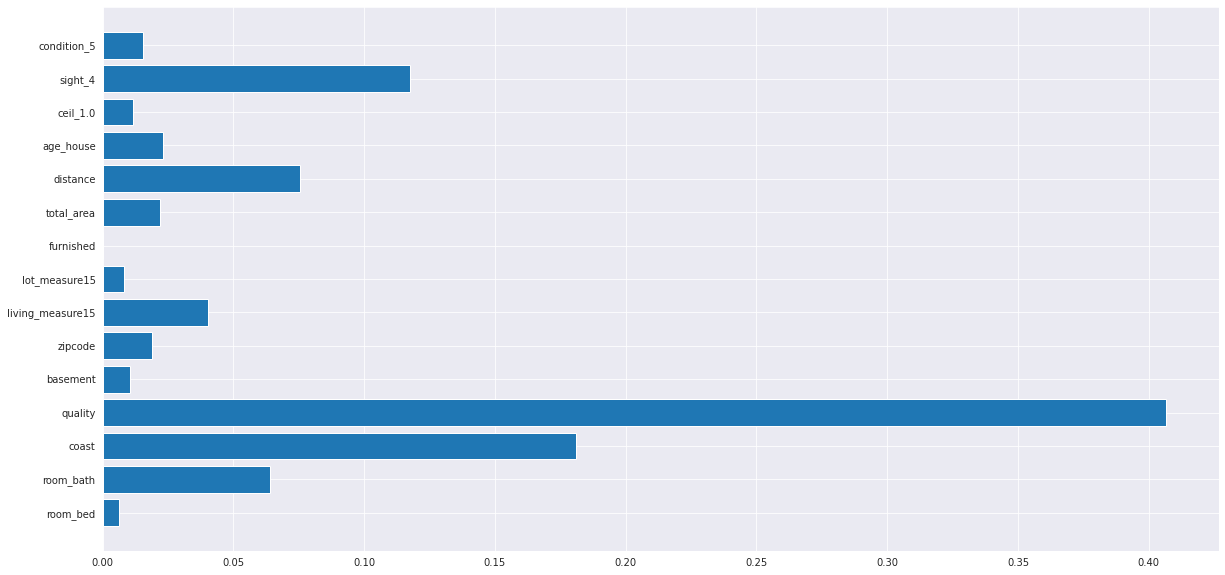

In [ ]:
# Feature Imporatnace:
plt.figure(figsize= (20,10))
plt.barh(X_train10.columns, xgbr11.feature_importances_)

In [ ]:
model_final = pd.DataFrame({"Model": ["XGB Regressor"], 
                               "Train Score": [xgbr_train_score11], 
                               "Test Score": [xgbr_test_score11], 
                               "MSE Train": [xgbr_MSE_train11], 
                               "MSE Test": [xgbr_MSE_test11]})
model_final

,Model,Train Score,Test Score,MSE Train,MSE Test
0,XGB Regressor,0.93,0.86,8.923551e+09,1.918797e+10


In [ ]:
# xgbr_train_score11, xgbr_test_score11, xgbr_MSE_train11, xgbr_MSE_test11
# (0.95, 0.87, 6546079774.575215, 18327133575.98576)

(0.95, 0.87, 6546079774.575215, 18327133575.98576)

## Conclusion:

Five most important deciding factors of predicting house prices: These five features have 85 % of weightage of deciding house prices- 
1. Quality of the house
2. Coast- If the house is lake side
3. Distance - how many km away the house is from central city of Seattle
4. Sight4- If the house is visited 4 times by customer for selling
5. bath room- how many bathrooms the house have